## Visulization

## 1. Most Frequent Citation

In [1]:
import pandas as pd

In [4]:
citation159 = pd.read_csv("citation159.csv", sep="\t", index_col=0)

In [5]:
citation159.head()

,file,citaion
0,052 - Nuance Communications Inc v ABBYY USA So...,813 F.3d 1368
1,021 - Intellectual Ventures I LLC v Erie Indem...,850 F.3d 1315
2,040 - Sioux Honey Ass'n v Hartford Fire Ins Co,672 F.3d 1041
3,021 - Aspex Eyewear Inc v Zenni Optical Inc,713 F.3d 1377
4,056 - Soverain Software LLC v Newegg Inc,728 F.3d 1332


In [23]:
cite10 = citation159.groupby(['citaion']).count().nlargest(10, 'file').\
rename(index=str, columns={"file": "times"}).assign(cite = cite10.index)

In [24]:
cite10

,times,cite
citaion,,
415 F.3d 1303,33,415 F.3d 1303
127 S.Ct. 1727,20,127 S.Ct. 1727
15 L.Ed.2d 545,20,15 L.Ed.2d 545
167 L.Ed.2d 705,20,167 L.Ed.2d 705
383 U.S. 1,20,383 U.S. 1
550 U.S. 398,20,550 U.S. 398
86 S.Ct. 684,20,86 S.Ct. 684
135 S.Ct. 831,19,135 S.Ct. 831
131 S.Ct. 2238,14,131 S.Ct. 2238


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
sns.set(rc={'figure.figsize':(9,5)}, 
        style = "whitegrid", 
        font="Times New Roman",
       font_scale=1.1)

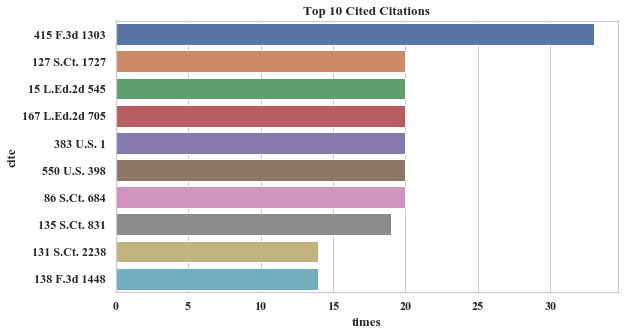

In [98]:
cite_freq = sns.barplot(x="times",y="cite", data=cite10). \
            set_title('Top 10 Cited Citations')

In [68]:
cite_freq.figure.savefig("cite_freq.png",quality=95,dpi=400,bbox_inches = 'tight')

## Author

In [149]:
import json
import regex as re

In [3]:
pdf2text = json.load(open('pdf2text159.json', 'r'))

In [6]:
pdf2text.keys()

dict_keys(['file_name', 'layouts', 'raw_text'])

In [8]:
files = pdf2text['file_name']

In [11]:
file_layers = pdf2text['layouts']

In [13]:
file_text = pdf2text['raw_text']

In [16]:
del pdf2text

In [167]:
def get_hold_text(file_layer):
    result = []
    for layer in file_layer:
        if re.search('[\[]?(Holding)s*[\:]', layer) != None:
            result.append(layer)
    return(result)

In [168]:
holds = []
for file_layer in file_layers:
    hold = get_hold_text(file_layer)
    holds.append(hold)  

In [171]:
for i in range(len(holds)):
    if holds[i] == []:
        print(i)

8
14
33
66
149
152


In [175]:
file_layers[66]

['Nobelbiz, Inc. v. Global Connect, L.L.C., 876 F.3d 1326 (2017)\n125 U.S.P.Q.2d 1367\n',
 '876 F.3d 1326\n',
 'United States Court of Appeals,\n',
 'Federal Circuit.\n',
 'NOBELBIZ, INC., Plaintiff-Appellee\n',
 'v.\n',
 'GLOBAL CONNECT, L.L.C., T C N, Inc., Defendants-Appellants\n',
 '2016-1104\n',
 '|\n',
 '2016-1105\n',
 '|\n',
 'December 8, 2017\n',
 'Appeals  from  the  United  States  District  Court  for  the  Eastern  District  of  Texas  in  Nos.  6:12-cv-00244-RWS,\n6:12-cv-00247-RWS,  6:13-cv-00804-MHS,  and  6:13-cv-00805-MHS,  Judge  Robert  Schroeder  III,  Judge  Michael  H.\nSchneider.\nON PETITION FOR REHEARING EN BANC\n',
 'Attorneys and Law Firms\n',
 'RALPH A. DENGLER, Venable LLP, New York, NY, filed a petition for rehearing en banc for plaintiff-appellee.\nAlso  represented  by  GIANNA  CRICCO-LIZZA;  MEGAN  S.  WOODWORTH,  Washington,  DC;  WILLIAM  A.\nHECTOR, San Francisco, CA.\n',
 'CLINTON EARL DUKE, Durham Jones & Pinegar, Salt Lake City, UT, filed a respon

In [172]:
en_banc_set

[8, 14, 33, 149, 152]

In [173]:
en_banc_set = []
for i in range(len(holds)):
    if holds[i] == []:
        en_banc_set.append(i)
        en_banc = []
        for layer in file_layers[i]:
            if re.search('(\.*)(the)\s(petition)(s\s|\s)(for)\s(rehearing)\s(en)\s(banc)\.\n', layer) != None:
                en_banc.append(layer)
        holds[i]= [en_banc[0]]
                

In [174]:
en_banc_set

[8, 14, 33, 66, 149, 152]

In [130]:
for i in range(len(holds)):
    if len(holds[i])>1:
        only_one = [holds[i][0]]
        holds[i] = only_one

In [131]:
for i in range(len(holds)):
    if len(holds[i])>1:
        print(i)

In [166]:
for layer in file_layers[4]:
    if re.search('[\[]?(Holding)s*[\:]', layer) != None:
        print(layer)

[Holding:]  The  Court  of  Appeals,  Newman,  Circuit  Judge,  705  F.3d  1333,reversed  in  part  and  vacated  in  part,  and
after granting rehearing, 515 Fed.Appx. 883, held that dependent “shopping cart” claim was invalid on the ground of
obviousness.



In [133]:
holds

[['Holdings: The Court of Appeals, Prost, Chief Judge, held that:\n'],
 ['Holdings: The Court of Appeals, Prost, Chief Judge, held that:\n'],
 ['Holdings: The Court of Appeals, Prost, Circuit Judge, held that:\n'],
 ['[Holding:] The Court of Appeals, Newman, Circuit Judge, held that licensor and sublicensee were collateral estopped\nfrom asserting their infringement claims.\n'],
 ['[Holding:]  The  Court  of  Appeals,  Newman,  Circuit  Judge,  705  F.3d  1333,reversed  in  part  and  vacated  in  part,  and\nafter granting rehearing, 515 Fed.Appx. 883, held that dependent “shopping cart” claim was invalid on the ground of\nobviousness.\n'],
 ['[Holding:] The Court of Appeals, Wallach, Circuit Judge, held that substantial evidence supported refusal by Board to\nregister mark.\n'],
 ['Holdings: The Court of Appeals, Clevenger, Circuit Judge, held that:\n'],
 ['Holdings: The Court of Appeals, Stoll, Circuit Judge, held that:\n'],
 ['Newman, Circuit Judge, dissents from the denial of the 